In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = 'c:/Windows/Fonts/'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)
set_font()

In [3]:
data=pd.read_excel('C:\\roundabout\\roundabout_project\\data\\모든교차로.xlsx')

In [4]:
data.head()

,교차로명,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 유무,읍면동평균속도,읍면동첨두시평행속도,읍면동승용차교통량,읍면동버스교통량,읍면동트럭교통량,교차로유형,스쿨존여부,회전교차로여부,사고건수,위도,경도
0,가덕지구대3,0,0,58.72,49.65,1587,36,419,3지,0,0,0,36.561536,127.541219
1,가마육교4,0,0,29.60,19.05,9683,110,1618,4지,0,0,4,36.596090,127.471779
2,강내월곡4,0,0,56.98,48.99,2610,113,1179,4지,0,0,6,36.624493,127.369452
3,강내탑연3,0,0,56.98,48.99,2610,113,1179,3지,0,0,4,36.623910,127.358570
4,강외서평3,0,0,35.29,15.31,14712,222,3193,3지,0,0,2,36.605214,127.309905


In [5]:
data.columns

Index(['교차로명', '교차로 반경 50m 내 무인교통단속카메라 수', '교차로 반경 50m 내 신호등 유무', '읍면동평균속도',
       '읍면동첨두시평행속도', '읍면동승용차교통량', '읍면동버스교통량', '읍면동트럭교통량', '교차로유형', '스쿨존여부',
       '회전교차로여부', '사고건수', '위도', '경도'],
      dtype='object')

In [6]:
data.columns = ['load','cctv', 'sign', 'speed',
       'peek_speed', 'car', 'bus', 'truck', 'type', 'school',
       'roundabout', 'accident', '위도', '경도']

In [7]:
model = data.drop(['위도','경도'],axis=1)

In [8]:
model.tail(10)

,load,cctv,sign,speed,peek_speed,car,bus,truck,type,school,roundabout,accident
70,오송서평회전교차로,0,0,35.29,15.31,14712,222,3193,5지,0,1,0
71,금천회전교차로,0,0,30.34,20.74,11048,129,1951,5지,0,1,14
72,문의파출소앞회전교차로,0,0,68.43,48.77,16520,641,6404,4지,0,1,0
73,내덕회전교차로,0,0,38.63,18.98,6110,87,1130,4지,0,1,3
74,석곡회전교차로,0,0,58.22,45.52,13088,470,4643,4지,0,1,12
75,북이회전교차로,0,0,35.49,15.67,10146,142,2067,4지,0,1,0
76,상당산성회전교차로,0,0,61.59,27.01,13487,373,4467,4지,0,1,1
77,가덕상야한계회전교차로,0,0,58.72,49.65,1587,36,419,3지,0,1,0
78,남이팔봉삼거리회전교차로,0,0,29.60,19.05,9683,110,1618,3지,0,1,0
79,오송쌍청교삼거리회전교차로,0,0,35.29,15.31,14712,222,3193,3지,0,1,0


In [9]:
model.drop(index=[71,74],axis=0,inplace=True)

In [10]:
circle_idx = model[model.load.str.contains('회전교차로')].index

In [11]:
before = model.drop(index=circle_idx,axis=0)['accident']

In [12]:
train = pd.get_dummies(model.drop('load',axis=1))

In [13]:
train.head()

,cctv,sign,speed,peek_speed,car,bus,truck,school,roundabout,accident,type_3지,type_4지,type_5지,type_6지
0,0,0,58.72,49.65,1587,36,419,0,0,0,1,0,0,0
1,0,0,29.60,19.05,9683,110,1618,0,0,4,0,1,0,0
2,0,0,56.98,48.99,2610,113,1179,0,0,6,0,1,0,0
3,0,0,56.98,48.99,2610,113,1179,0,0,4,1,0,0,0
4,0,0,35.29,15.31,14712,222,3193,0,0,2,1,0,0,0


In [14]:
test = pd.read_excel('C:\\roundabout\\roundabout_project\\data\\test.xlsx')

In [15]:
test_name = test['교차로명']

In [16]:
test=test.set_index('교차로명')

In [17]:
test = pd.get_dummies(test)

In [18]:
train_x = train.drop('accident',axis=1)
train_y = train['accident']


In [19]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.kernel_ridge import KernelRidge

In [20]:
train_x.columns=['cctv', 'sign', 'speed', 'peek_speed', 'car', 'bus', 'truck', 'school',
       'roundabout', 'type_3', 'type_4', 'type_5', 'type_6']

In [21]:
test.columns=['cctv', 'sign', 'speed', 'peek_speed', 'car', 'bus', 'truck', 'school',
       'roundabout', 'type_3', 'type_4', 'type_5', 'type_6']

In [22]:
rf= RandomForestRegressor()
ada = AdaBoostRegressor()
gra = GradientBoostingRegressor()
xgb = XGBRegressor()
gbm = LGBMRegressor()
svm = SVR()
lasso = Lasso()
ridge = Ridge()
elast = ElasticNet()
kr = KernelRidge()

In [23]:
model = [rf,ada,gra,xgb,gbm,svm,lasso,ridge,elast,kr]
idx=0
score_table=pd.DataFrame({'교차로명':test_name,'before':before})
for i in model:
    i.fit(train_x,train_y)
    pred = i.predict(test)
    score_table['{}_after'.format(i.__class__.__name__)]=pred
    
    
score_table = score_table.set_index('교차로명')
score_table

,before,RandomForestRegressor_after,AdaBoostRegressor_after,GradientBoostingRegressor_after,XGBRegressor_after,LGBMRegressor_after,SVR_after,Lasso_after,Ridge_after,ElasticNet_after,KernelRidge_after
교차로명,,,,,,,,,,,
가덕지구대3,0,0.780000,1.000000,-0.330601,-0.001456,0.480831,3.650963,5.463127,0.733362,5.335109,0.756495
가마육교4,4,0.956667,3.000000,0.149099,0.577316,2.271426,3.900000,4.896727,2.289101,4.775097,2.235938
강내월곡4,6,4.110000,5.000000,3.329363,2.354141,5.663712,3.907871,4.968790,4.114033,5.065307,4.019766
강내탑연3,4,2.120000,3.179487,2.273706,0.693464,2.801686,3.907871,4.968790,0.165035,4.791060,0.080153
강외서평3,2,0.355000,0.000000,-0.168324,0.002768,1.002524,2.100000,3.702772,-2.339807,3.276496,-2.268984
...,...,...,...,...,...,...,...,...,...,...,...
터미널4,10,6.119000,5.727273,5.695178,4.179464,10.341344,3.974559,4.860026,3.910430,4.858877,3.879287
하이닉스반도체4,6,4.294000,5.366667,2.485264,3.914397,5.248191,3.504056,4.689414,3.789466,4.705629,3.782122
현도면사무소3,3,2.237333,0.500000,1.478525,0.412824,3.236078,2.049984,4.094298,4.939518,4.847865,4.864417


In [24]:
# svr,xgboost,gra

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
svm

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
svm_params={"C":[1,5,10],"kernel":['rbf','poly'],"tol":[1e-4,1e-2,0.1]}
svm_cv=GridSearchCV(svm,svm_params)

In [28]:
svm_cv.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'kernel': ['rbf', 'poly'],
                         'tol': [0.0001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
svm_cv.best_params_

{'C': 10, 'kernel': 'rbf', 'tol': 0.1}

In [30]:
score_table['svm_cv'] = svm_cv.predict(test)

In [31]:
xgb_params = {'eta':[0.03,0.05,0.01],'max_depth' : [10,15,20],'max_delta_step':[1,2,4,6],'n_estimators':[50,100,200]}

In [32]:
xgb_cv = GridSearchCV(xgb,xgb_params)
xgb_cv.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_j...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=None,
  

In [33]:
xgb_cv.best_params_

{'eta': 0.03, 'max_delta_step': 1, 'max_depth': 20, 'n_estimators': 50}

In [34]:
score_table['xgb_cv'] = xgb_cv.predict(test)

In [35]:
score_table[['before','xgb_cv']]

,before,xgb_cv
교차로명,,
가덕지구대3,0,-0.000063
가마육교4,4,0.553507
강내월곡4,6,1.398638
강내탑연3,4,2.175730
강외서평3,2,0.000634
...,...,...
터미널4,10,-0.118291
하이닉스반도체4,6,1.244692
현도면사무소3,3,1.168102


In [36]:
gra_params = {'learning_rate':[0.03,0.05,0.01],'n_estimators':[50,100,200],'max_depth':[10,15,20]}

In [37]:
gra_cv = GridSearchCV(gra,gra_params)
gra_cv.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [38]:
gra_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}

In [39]:
score_table['gra_cv'] = gra_cv.predict(test)

In [40]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(train_x,train_y)
pred = lin.predict(test)

In [41]:
score_table['lin'] = pred

In [42]:
score_table

,before,RandomForestRegressor_after,AdaBoostRegressor_after,GradientBoostingRegressor_after,XGBRegressor_after,LGBMRegressor_after,SVR_after,Lasso_after,Ridge_after,ElasticNet_after,KernelRidge_after,svm_cv,xgb_cv,gra_cv,lin
교차로명,,,,,,,,,,,,,,,
가덕지구대3,0,0.780000,1.000000,-0.330601,-0.001456,0.480831,3.650963,5.463127,0.733362,5.335109,0.756495,3.046415,-0.000063,2.769066,0.400342
가마육교4,4,0.956667,3.000000,0.149099,0.577316,2.271426,3.900000,4.896727,2.289101,4.775097,2.235938,4.133835,0.553507,2.769066,2.042128
강내월곡4,6,4.110000,5.000000,3.329363,2.354141,5.663712,3.907871,4.968790,4.114033,5.065307,4.019766,3.886416,1.398638,3.259083,3.955636
강내탑연3,4,2.120000,3.179487,2.273706,0.693464,2.801686,3.907871,4.968790,0.165035,4.791060,0.080153,3.886413,2.175730,3.028791,-0.206372
강외서평3,2,0.355000,0.000000,-0.168324,0.002768,1.002524,2.100000,3.702772,-2.339807,3.276496,-2.268984,1.579418,0.000634,2.769066,-2.711839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
터미널4,10,6.119000,5.727273,5.695178,4.179464,10.341344,3.974559,4.860026,3.910430,4.858877,3.879287,4.220332,-0.118291,5.534024,3.635291
하이닉스반도체4,6,4.294000,5.366667,2.485264,3.914397,5.248191,3.504056,4.689414,3.789466,4.705629,3.782122,3.697783,1.244692,4.744036,3.511214
현도면사무소3,3,2.237333,0.500000,1.478525,0.412824,3.236078,2.049984,4.094298,4.939518,4.847865,4.864417,2.088422,1.168102,2.769066,4.749775


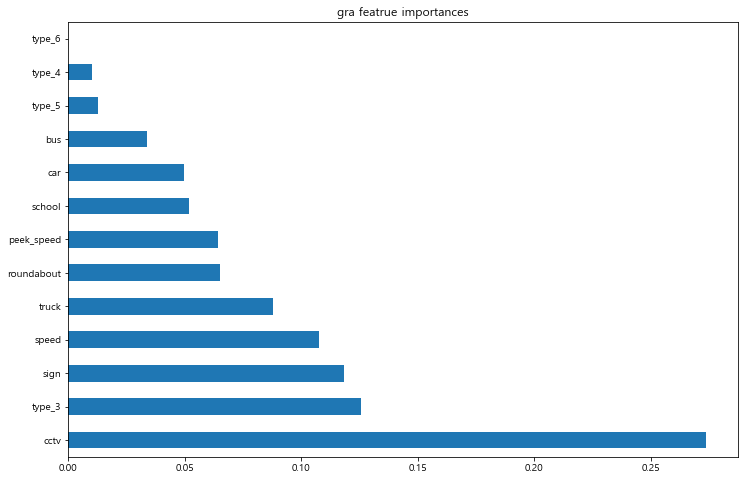

In [50]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gra.feature_importances_, index=train_x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.title('gra featrue importances')
plt.show()

In [44]:
# score_table.to_excel('모델별 교차로 감소 예측.xlsx')